1️⃣ Generate a complex dataset (y = x³ + noise).
2️⃣ Fit a Linear Regression model.
3️⃣ Visualize how poorly the linear model fits the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate a complex dataset (cubic relationship)
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)  # Feature (1D)
y = X**3 + np.random.normal(scale=5, size=X.shape)  # Cubic function + noise




In [4]:
X[:5]

array([[-3.        ],
       [-2.93939394],
       [-2.87878788],
       [-2.81818182],
       [-2.75757576]])

In [6]:
X[0]**3, y[0]

(array([-27.]), array([-24.51642923]))

In [8]:
np.random.normal(scale=5, size=1)

array([-2.10322661])

In [5]:
y[:5]

array([[-24.51642923],
       [-26.08779311],
       [-20.61928055],
       [-14.76726995],
       [-22.13999079]])

In [2]:
# Fit a simple Linear Regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)



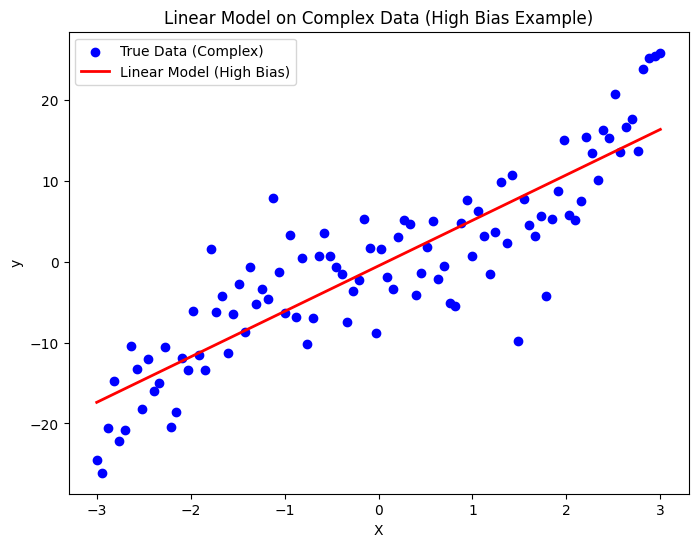

In [3]:
# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", label="True Data (Complex)")
plt.plot(X, y_pred, color="red", linewidth=2, label="Linear Model (High Bias)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Model on Complex Data (High Bias Example)")
plt.legend()
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [10]:
# Polynomial Regression (degree=3)
degree = 3
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X, y)
y_pred_poly = poly_model.predict(X)



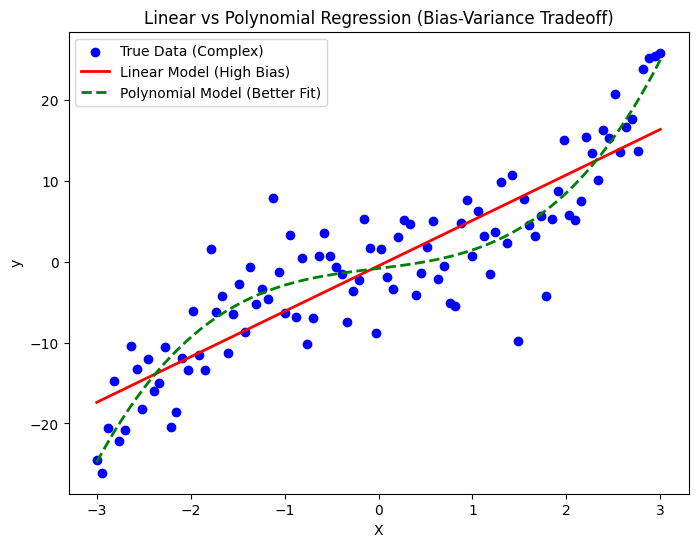

In [12]:
# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", label="True Data (Complex)")
plt.plot(X, y_pred, color="red", linewidth=2, label="Linear Model (High Bias)")
plt.plot(X, y_pred_poly, color="green", linewidth=2, linestyle="dashed", label="Polynomial Model (Better Fit)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear vs Polynomial Regression (Bias-Variance Tradeoff)")
plt.legend()
plt.show()

1️⃣ Generate a small dataset with random noise.
2️⃣ Fit a high-degree polynomial model (degree=10), making it too complex for the small dataset.
3️⃣ Compare it with a simpler model (degree=2) to visualize overfitting.

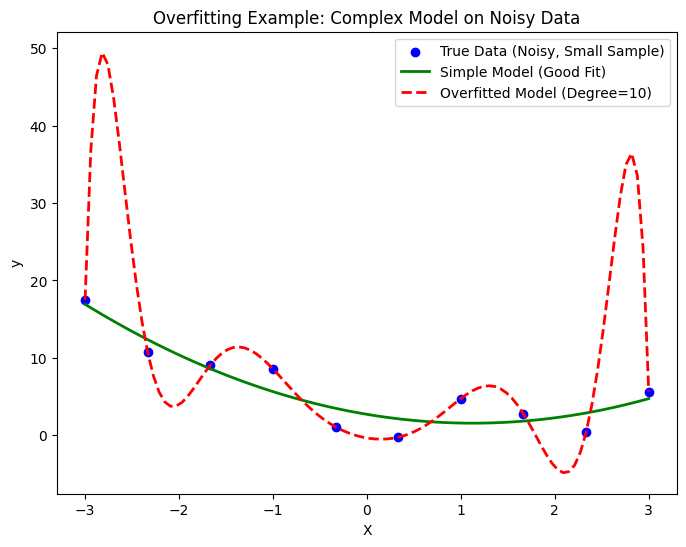

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate a small dataset with noise
np.random.seed(42)
X = np.linspace(-3, 3, 10).reshape(-1, 1)  # Only 10 data points
y = X**2 - 2*X + 1 + np.random.normal(scale=3, size=X.shape)  # Quadratic function + noise

# Fit a simple Polynomial Regression model (degree=2)
simple_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
simple_model.fit(X, y)
y_pred_simple = simple_model.predict(X)

# Fit an overly complex Polynomial Regression model (degree=10) → Overfitting!
complex_model = make_pipeline(PolynomialFeatures(10), LinearRegression())
complex_model.fit(X, y)
y_pred_complex = complex_model.predict(X)

# Generate smooth X values for visualization
X_smooth = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred_simple_smooth = simple_model.predict(X_smooth)
y_pred_complex_smooth = complex_model.predict(X_smooth)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", label="True Data (Noisy, Small Sample)")
plt.plot(X_smooth, y_pred_simple_smooth, color="green", linewidth=2, label="Simple Model (Good Fit)")
plt.plot(X_smooth, y_pred_complex_smooth, color="red", linewidth=2, linestyle="dashed", label="Overfitted Model (Degree=10)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Overfitting Example: Complex Model on Noisy Data")
plt.legend()
plt.show()


#Dummy data Example

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 🔹 Step 1: Create Dummy NIFTY Data (Simulated)
np.random.seed(42)
days = np.arange(1, 21)  # Simulating 20 trading days
nifty_close = 18000 + (days * 10) + np.sin(days) * 200 + np.random.normal(0, 100, size=days.shape)  # Trend + Noise
df = pd.DataFrame({"Day": days, "NIFTY_Close": nifty_close})

df.head()


,Day,NIFTY_Close
0,1,18227.965612
1,2,18188.033055
2,3,18122.992855
3,4,18040.942487
4,5,17834.799808


In [15]:
# 🔹 Step 2: Prepare Data for Modeling
X = df["Day"].values.reshape(-1, 1)  # Feature (Days)
y = df["NIFTY_Close"].values         # Target (Closing Price)



In [16]:
# 🔹 Step 3: Fit a Simple Model (Linear Regression)
simple_model = LinearRegression()
simple_model.fit(X, y)
y_pred_simple = simple_model.predict(X)

# 🔹 Step 4: Fit an Overfitted Model (Polynomial Regression, degree=10)
complex_model = make_pipeline(PolynomialFeatures(10), LinearRegression())
complex_model.fit(X, y)
y_pred_complex = complex_model.predict(X)



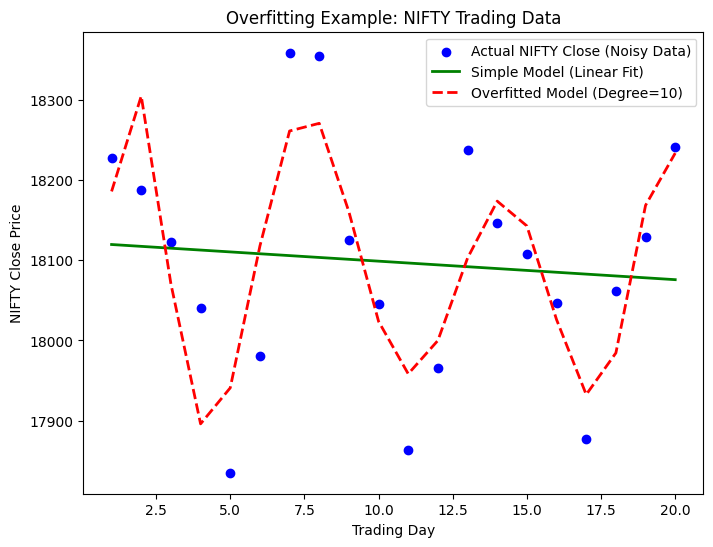

In [17]:
# 🔹 Step 5: Visualize the Overfitting Effect
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", label="Actual NIFTY Close (Noisy Data)")
plt.plot(X, y_pred_simple, color="green", linewidth=2, label="Simple Model (Linear Fit)")
plt.plot(X, y_pred_complex, color="red", linewidth=2, linestyle="dashed", label="Overfitted Model (Degree=10)")
plt.xlabel("Trading Day")
plt.ylabel("NIFTY Close Price")
plt.title("Overfitting Example: NIFTY Trading Data")
plt.legend()
plt.show()